<a href="https://colab.research.google.com/github/rajni0829/Playing-With-Audio/blob/master/Feature%20Extraction%20of%20Audio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'numpy.ndarray'> <class 'int'>


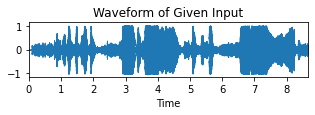

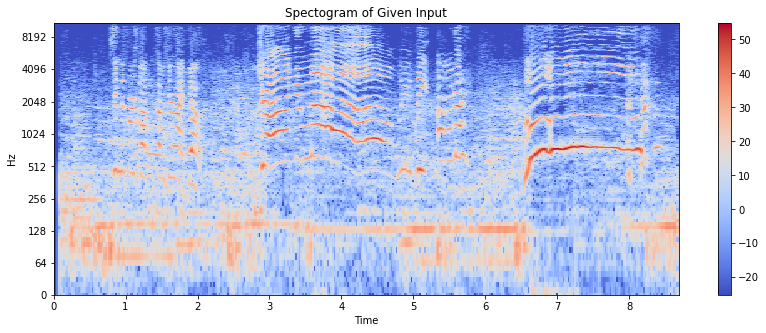

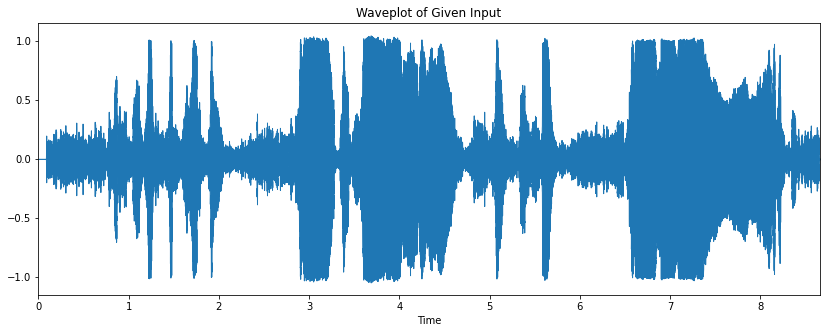

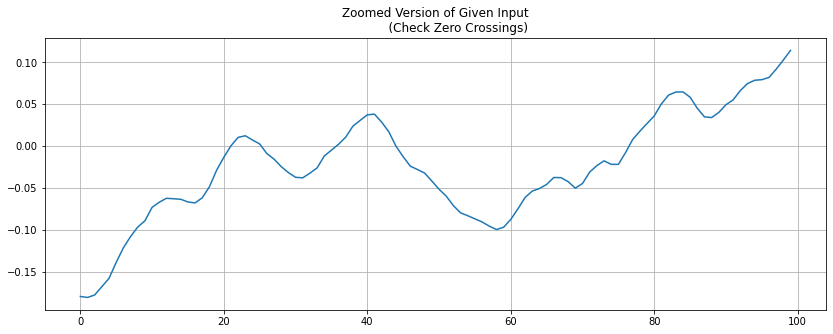

Count of zero Crossing :  5


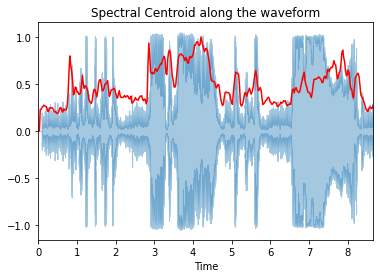

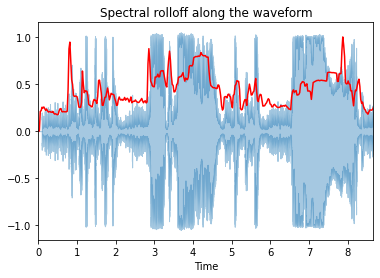

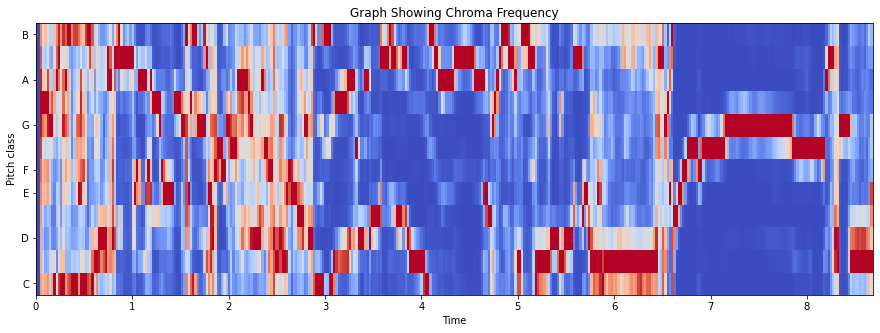

(20, 374)


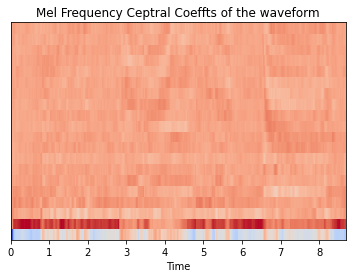

mfccs with zero Mean :
 [-5.09986275e-09  0.00000000e+00 -2.03994510e-08  1.01997255e-08
  0.00000000e+00 -1.01997255e-08  1.01997255e-08 -5.09986275e-09
  2.03994510e-08  0.00000000e+00 -1.01997255e-08  5.09986275e-09
  1.01997255e-08  1.01997255e-08  0.00000000e+00  1.01997255e-08
  1.01997255e-08 -7.64979369e-09 -2.54993138e-09 -1.52995874e-08]


mfccs with unit Variance :
 [1.0000001  1.0000001  1.         1.0000001  1.0000001  1.0000001
 1.         1.         0.99999994 1.0000001  1.         1.
 1.0000001  1.0000001  1.0000001  0.99999994 1.         1.0000001
 1.         0.99999994]


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:236: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  "Numerical issues were encountered "
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:255: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  "Numerical issues were encountered "


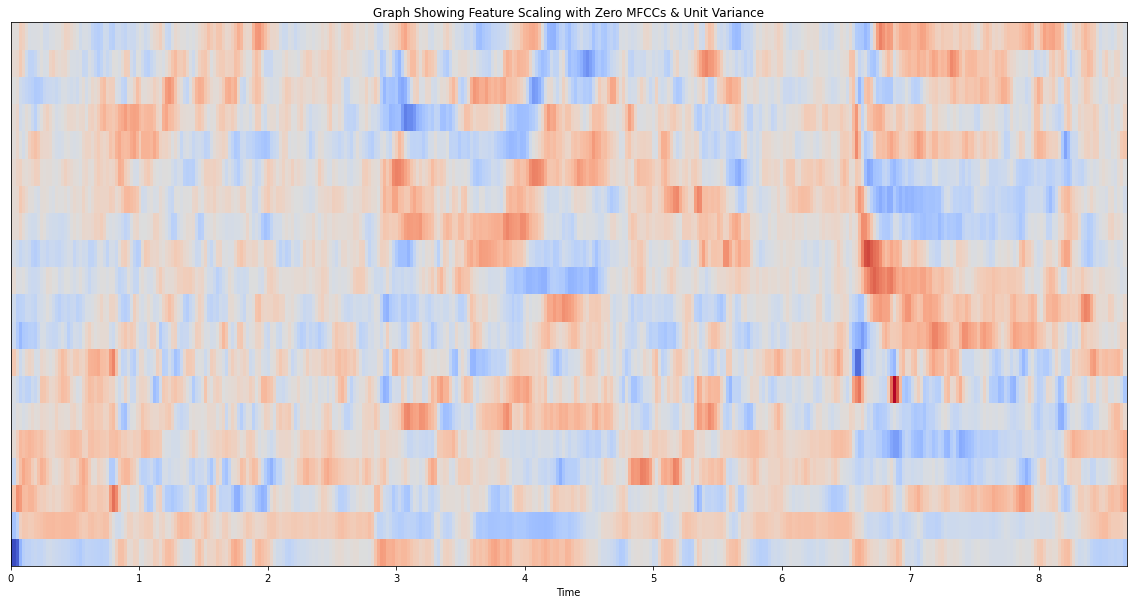

In [5]:
# Feature Extraction of Audio in Python


# Loading an audio
import librosa                                         # used for audio reltd stuffs
audio_path = 'my_audio.wav'
x , sr = librosa.load(audio_path)
print(type(x), type(sr))
librosa.load(audio_path, sr=44100)


# Playing an audio
import IPython.display as ipd
ipd.Audio(audio_path)                                  # plays the music


# display waveform
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(5,1))
plt.title("Waveform of Given Input")
librosa.display.waveplot(x, sr=sr)
plt.show()


# display Spectrogram
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
plt.title("Spectogram of Given Input")
# librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 

# If to print log of frequencies  
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()
plt.show()



#The zero crossing rate is the rate of sign-changes along a signal 
#rate at which the signal changes from positive to negative or back
x, sr = librosa.load(audio_path)
#Plot the signal:
plt.figure(figsize=(14, 5))
plt.title("Waveplot of Given Input")
librosa.display.waveplot(x, sr=sr)
# plt.show()



# Zooming in
a = 9000
b = 9100
# Here we will zoom or print spectrum for 100 array columns only.
plt.figure(figsize=(14, 5))
plt.title('''Zoomed Version of Given Input
            (Check Zero Crossings)''')
plt.plot(x[a:b])
plt.grid()
plt.show()
zero_crossings = librosa.zero_crossings(x[a:b], pad=False)
summ = (sum(zero_crossings))
print("Count of zero Crossing : ",summ)

# It indicates where the ”centre of mass” for a sound is located and is 
# calculated as the weighted mean of the frequencies present in the sound.

# If the frequencies in music are same throughout then spectral centroid would be around
# a centre and if there are high frequencies at the end of sound then the centroid would be towards its end.

import sklearn
from jedi.api.refactoring import inline
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
#spectral centroid -- centre of mass -- weighted mean of the frequencies present in the sound
spectral_centroids.shape

# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)



#Plotting the Spectral Centroid along the waveform
plt.title("Spectral Centroid along the waveform")
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')
plt.show()



# Spectral rolloff is the frequency below which a specified percentage of the total spectral energy, e.g. 85%, lies.
spectral_rolloff = librosa.feature.spectral_rolloff(x, sr=sr)[0]
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')
plt.title("Spectral rolloff along the waveform")
plt.show()



# Chroma Frequency        (eg : Benthoven's Fifth Symphony)
# entire spectrum is projected onto 12 bins representing the 12 distinct semitones (or chroma) of the musical octave
hop_length = 512
chromagraph = librosa.feature.chroma_stft(x,sr=sr,hop_length=hop_length)
plt.figure(figsize=(15,5))                       # audio signal decomposes into 12 chroma subbands
librosa.display.specshow(chromagraph,x_axis='time',y_axis='chroma',hop_length=hop_length,cmap='coolwarm')
plt.title("Graph Showing Chroma Frequency")
plt.show()



# MFCCs of a signal - small set of features (usually about 10–20) which concisely describe the overall shape of a spectral envelope.
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)

#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.title("Mel Frequency Ceptral Coeffts of the waveform")
plt.show()



# Feature Scaling
# scaling such that each coefft dimension has zero mean & unit var
mfccs = sklearn.preprocessing.scale(mfccs,axis=1)
print("mfccs with zero Mean :\n",mfccs.mean(axis=1))
print("\n")
print("mfccs with unit Variance :\n",mfccs.var(axis=1))

plt.figure(figsize=(20,10))
plt.title("Graph Showing Feature Scaling with Zero MFCCs & Unit Variance")
librosa.display.specshow(mfccs,sr=sr,x_axis='time')
plt.show()
